In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Math_6397/CH01

/content/drive/MyDrive/Math_6397/CH01


In [ ]:
#(a) 
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

X = scipy.io.loadmat(os.path.join('..','DATA','VORTALL.mat'))
data=X['VORTALL']

In [ ]:
print(data)

[[-5.92220e-15 -4.68318e-15 -2.94902e-15 ... -9.62025e-15 -8.86421e-15
  -7.27853e-15]
 [-6.01624e-15 -4.61205e-15 -2.58238e-15 ... -9.57891e-15 -8.89550e-15
  -7.31406e-15]
 [-5.92116e-15 -4.68413e-15 -2.50956e-15 ... -9.98390e-15 -8.95430e-15
  -7.50686e-15]
 ...
 [-1.47386e-02 -5.92327e-03 -1.69510e-03 ... -3.54696e-02 -3.64824e-02
  -2.84128e-02]
 [-1.36956e-02 -5.31169e-03 -1.47472e-03 ... -4.07780e-02 -3.80910e-02
  -2.78294e-02]
 [-1.26353e-02 -4.73980e-03 -1.27796e-03 ... -4.49435e-02 -3.89362e-02
  -2.69284e-02]]


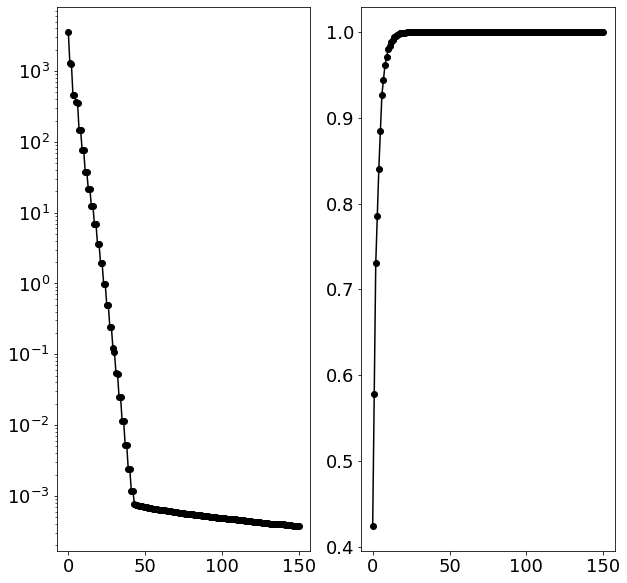

In [90]:
[U,S,V]= np.linalg.svd(data,full_matrices=0)
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='k')    #singular value spectra
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')

In [91]:
np.shape(U)

(89351, 151)

In [92]:
#prime factor of shape of U
num=89351;
for i in range(1, num+1):
    if(num % i) == 0:
        print(i, end=' ')

1 199 449 89351 

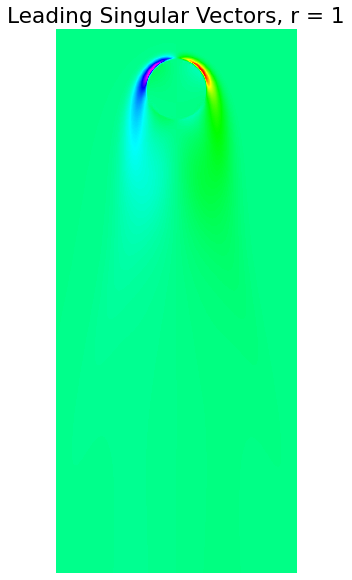

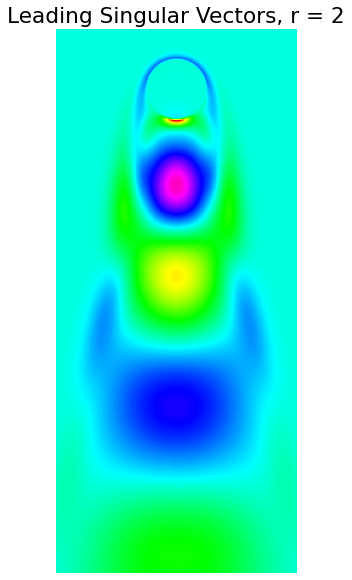

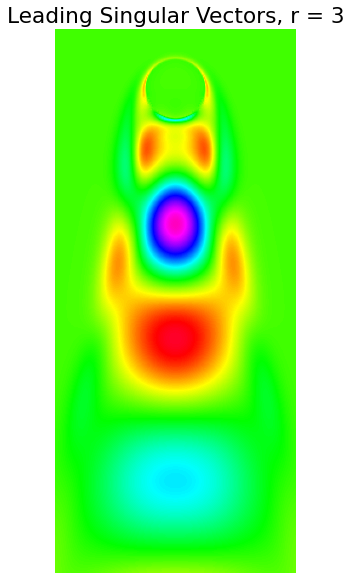

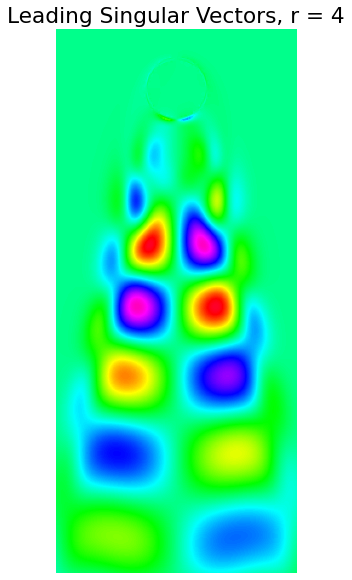

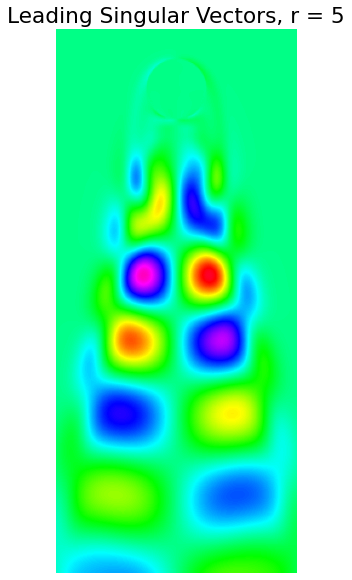

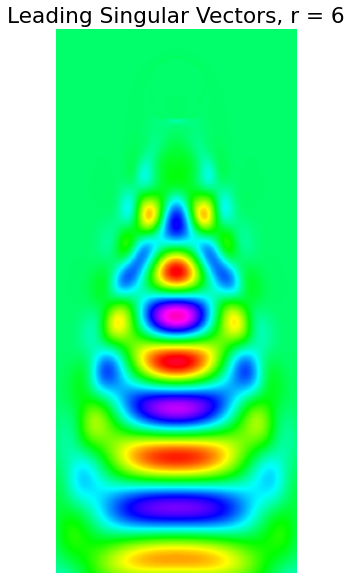

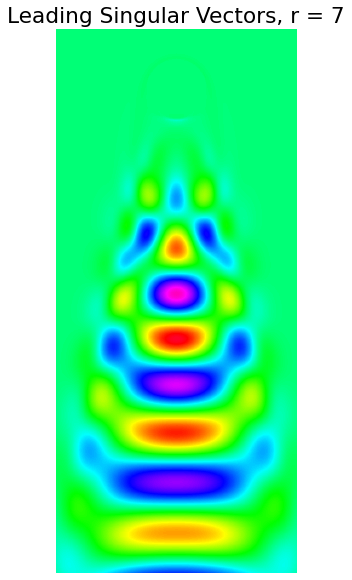

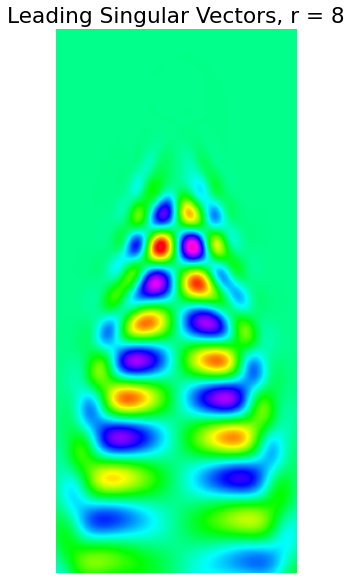

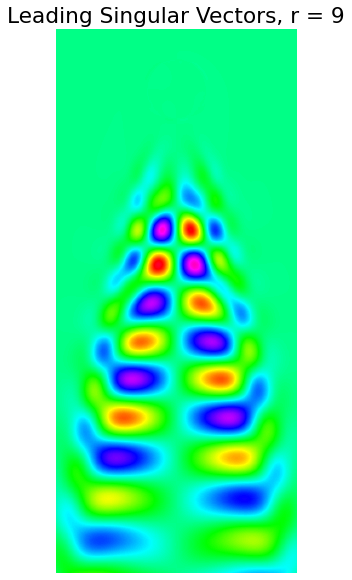

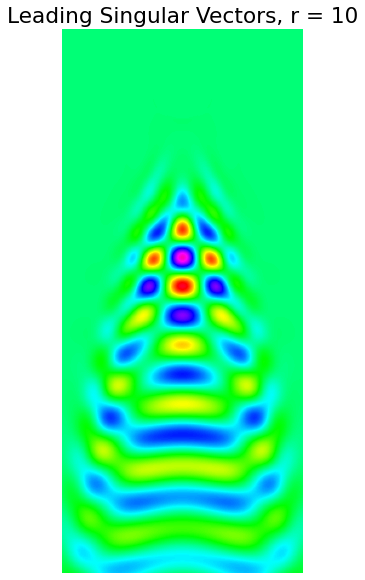

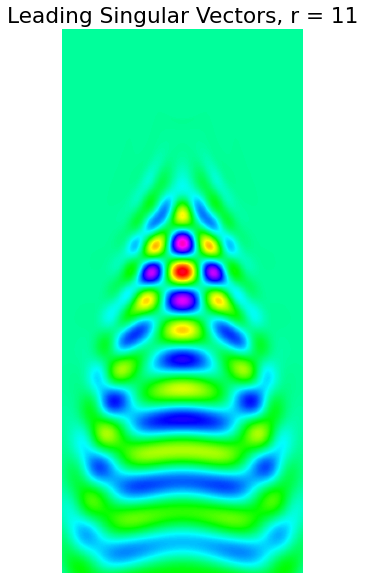

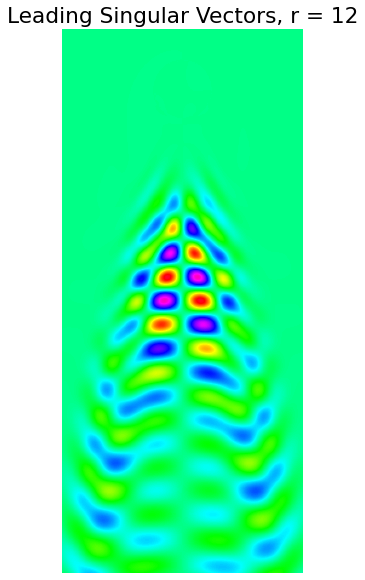

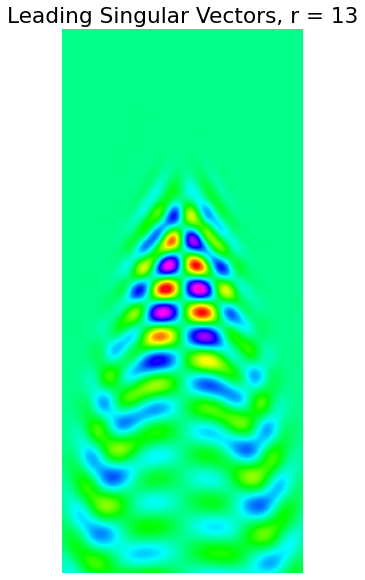

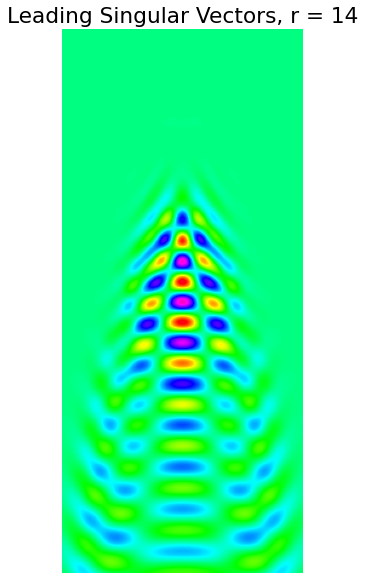

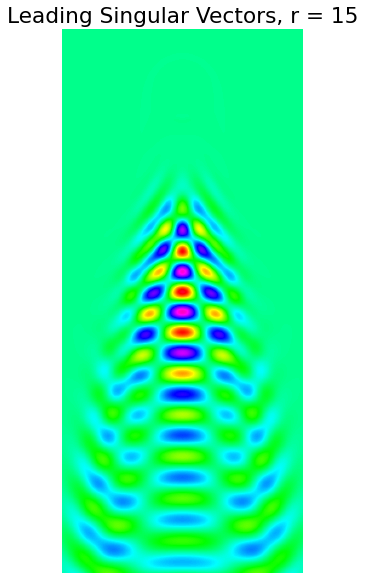

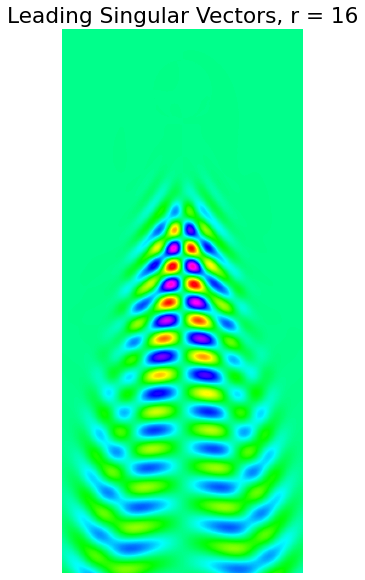

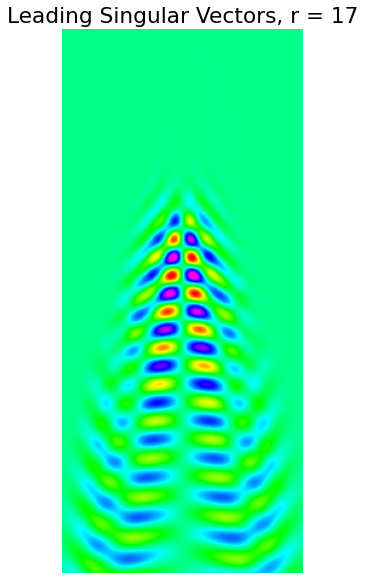

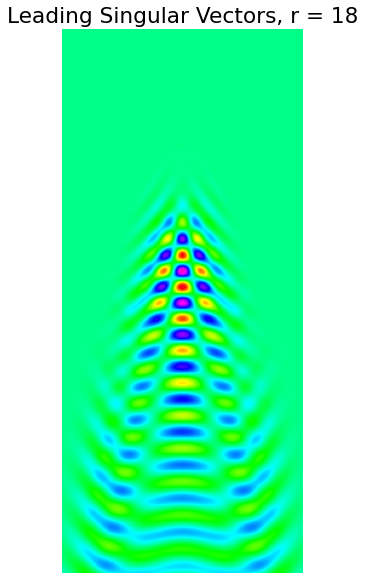

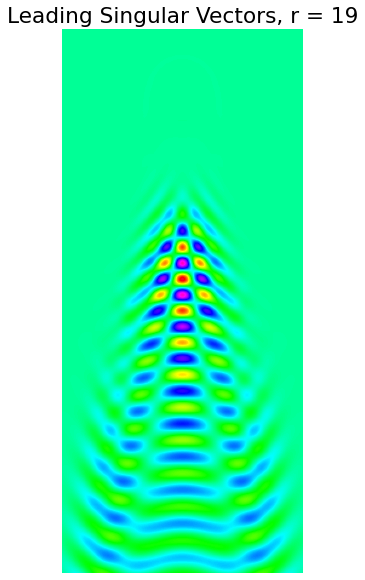

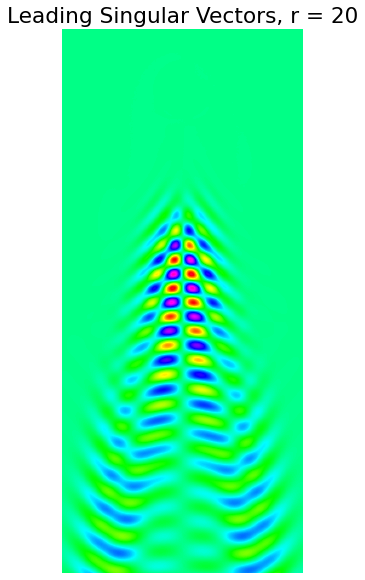

In [93]:
#leading singular vectors

for j in range(20):
    lead_vec=np.reshape(U[:,j],(449,199))
    plt.figure(j+1)
    j += 1
    img = plt.imshow(lead_vec)
    plt.axis('off')
    plt.set_cmap("gist_rainbow")
    plt.title('Leading Singular Vectors, r = ' + str(j))
    plt.show()

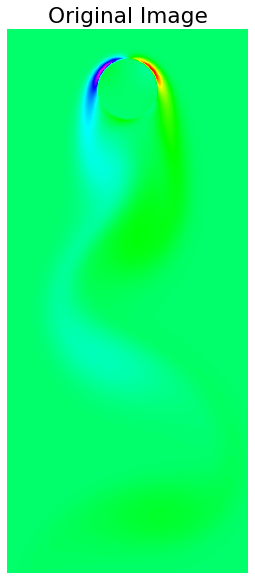

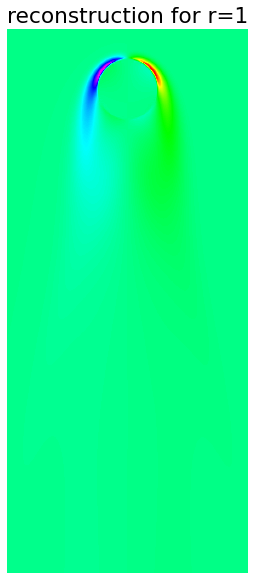

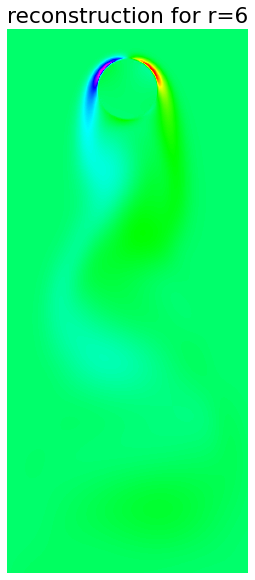

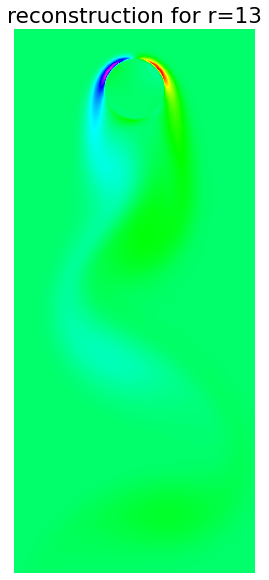

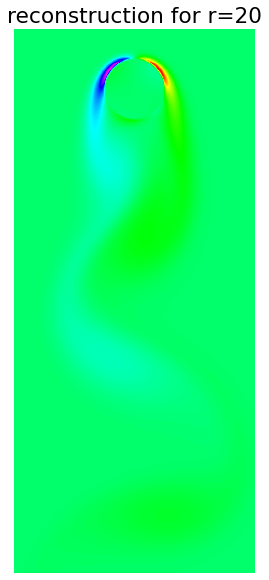

In [177]:
# (b)

j=10; #number of fluid field among 151 total column
plt.imshow(np.reshape(data[:,j],(449,199)))
plt.set_cmap('gist_rainbow')
plt.title('Original Image')
plt.axis('off')
plt.show()

for r in (1, 6, 13, 20):
  st=np.diag(S)
  # Construct truncated image
  Xr = U[:,:r] @ st[:r,:r] @ V[:r,:]
  Xrr=np.reshape(Xr[:,j],(449,199))  #the first column of the flow field

  np.shape(Xrr)
  plt.imshow(Xrr)
  plt.set_cmap('gist_rainbow')
  plt.title('reconstruction for r=' + str(r))
  plt.axis('off')
  plt.show()

In [94]:

cdS = np.cumsum(S) / np.sum(S) # Cumulative energy
r90 = np.min(np.where(cdS > 0.90)) # Find r to capture 90% energy
r99 = np.min(np.where(cdS > 0.99)) # Find r to capture 99% energy
r99_point_9 = np.min(np.where(cdS > 0.999)) # Find r to capture 99.9% energy

print(r90)
print(r99)
print(r99_point_9)

6
13
20


Means, minimum value of r needs to be 6 to capture 90% energy. Similarly to capture 99%n and 99.9% energy minimum corresponding value of r needs to be 13 and 20.

In [185]:
#Frobenius norm of error
er=np.linalg.norm(data-Xr, 'fro')/ np.linalg.norm(data, 'fro')
sq_er=er*er
print(er,sq_er)

0.0011638904610382663 1.354641005295868e-06


In [162]:
np.shape(Xr[:,0])

(89351,)